## Perceptrón
## Predecir tipo de flor de iris

**Nombre:** David L. Mejía<br>
**Fecha:** 01/10/2025<br>
**Git:** https://github.com/mcdavidleonardo/MachineLearning2/blob/master/Perceptron_FlorIris.ipynb<br>

El conjunto de datos flor Iris o conjunto de datos iris de Fisher es un conjunto de datos multivariante introducido por Ronald Fisher en su artículo de 1936, The use of multiple measurements in
taxonomic problems (El uso de medidas múltiples en problemas taxonómicos) como un ejemplo de
análisis discriminante lineal. A veces, se llama Iris conjunto de datos de Anderson porque Edgar
Anderson coleccionó los datos para cuantificar la variación morfológica de la flor Iris de tres especies
relacionadas. Dos de las tres especies se coleccionaron en la Península de la Gaspesia «todos son
de la misma pastura, y recolectado el mismo día y medidos al mismo tiempo por la misma persona
con el mismo aparato».
El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris
virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo
y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un
modelo discriminante lineal para distinguir entre una especie y otra.

In [1]:
# Se lee el conjunto de datos que ya viene incluido en la librería sklearn
from sklearn.datasets import load_iris

In [2]:
# Cargamos el conjunto de datos
iris_dataset = load_iris()

In [22]:
# Visualizamos las etiquetas del conjunto de datos
target_names = iris_dataset.target_names
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris_dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# Leemos el conjunto de datos con la libreria Pandas
import pandas as pd
import numpy as np

df = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target']],
columns= iris_dataset['feature_names'] + ['target'])
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Visualización del conjunto de datos

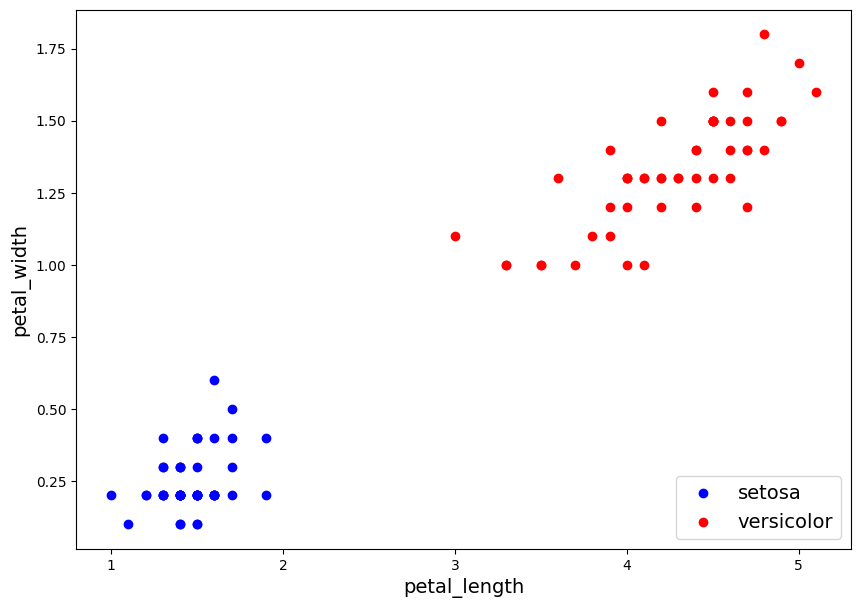

In [6]:
# Representacion grafica de dos dimensiones del conjunto de datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))

plt.scatter(df["petal length (cm)"][df["target"] == 0],
            df["petal width (cm)"][df["target"] == 0], c="b", label="setosa")

plt.scatter(df["petal length (cm)"][df["target"] == 1],
            df["petal width (cm)"][df["target"] == 1], c="r", label="versicolor")

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.show()

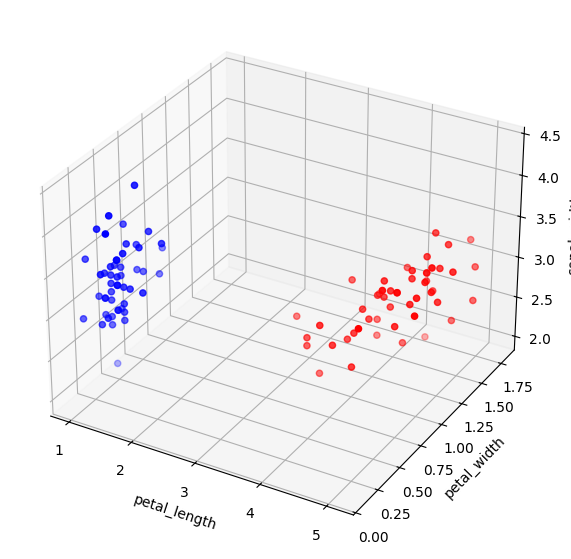

In [7]:
# Representacion grafica de tres dimensiones del conjunto de datos
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(df["petal length (cm)"][df["target"] == 0],
             df["petal width (cm)"][df["target"] == 0],
             df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1],
             df["petal width (cm)"][df["target"] == 1],
             df["sepal width (cm)"][df["target"] == 1], c="r")

ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")

plt.show()

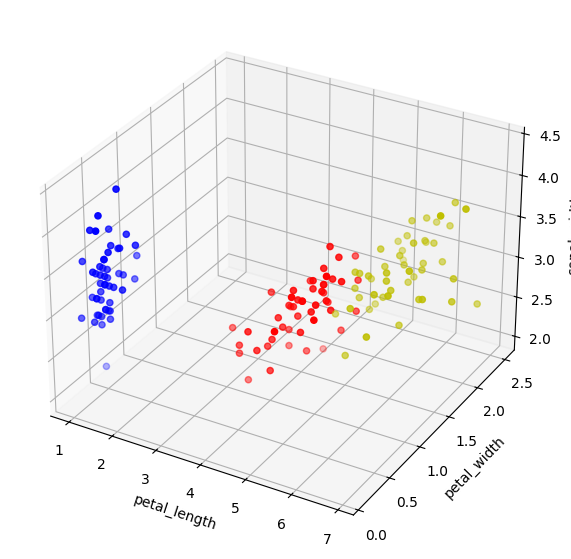

In [8]:
# Representacion grafica de tres dimensiones del conjunto de datos
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(df["petal length (cm)"][df["target"] == 0],
             df["petal width (cm)"][df["target"] == 0],
             df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1],
             df["petal width (cm)"][df["target"] == 1],
             df["sepal width (cm)"][df["target"] == 1], c="r")

ax.scatter3D(df["petal length (cm)"][df["target"] == 2],
             df["petal width (cm)"][df["target"] == 2],
             df["sepal width (cm)"][df["target"] == 2], c="y")

ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")

plt.show()

## Entrenamiento del algoritmo

In [9]:
# Reducimos el conjunto de datos para entrenar el algoritmo y visualizar el resultado
df_reduced = df[["petal length (cm)", "petal width (cm)", "target"]]
df_reduced = df_reduced.loc[df_reduced["target"].isin([0, 1])]
df_reduced

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
95,4.2,1.2,1.0
96,4.2,1.3,1.0
97,4.3,1.3,1.0
98,3.0,1.1,1.0


In [10]:
# Separamos las etiquetas de salida del resto de caracteristicas del conjunto de datos
X_df = df_reduced[["petal length (cm)", "petal width (cm)"]]
y_df = df_reduced["target"]


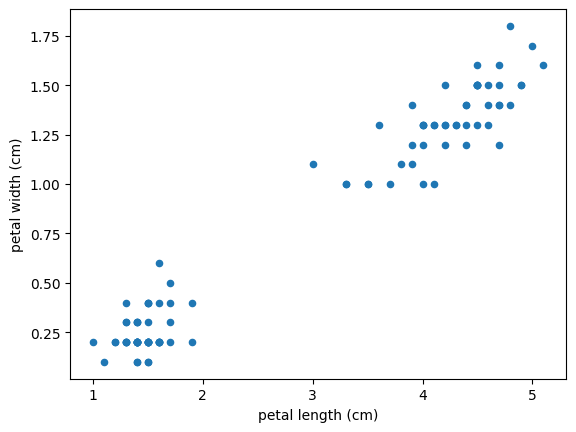

In [11]:
# Visualizamos el conjunto de datos de entrenamiento reducido
X_df.plot.scatter("petal length (cm)", "petal width (cm)")
plt.show()

In [12]:
y_df

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Name: target, Length: 100, dtype: float64

In [13]:
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter=1000, random_state=40)
clf.fit(X_df, y_df)


,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,40


## Visualización del límite de decisión construido por el algoritmo

# z(x) = x1*w1 + x2*w2 + b = x1*0.9 + x2*1.3 + (-3)

In [14]:
# Parametros del modelo
clf.coef_


array([[0.9, 1.3]])

In [15]:
# Terminio de interceptacion
clf.intercept_


array([-3.])

C:\Users\mcdav\anaconda3\envs\MachineLearning2\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


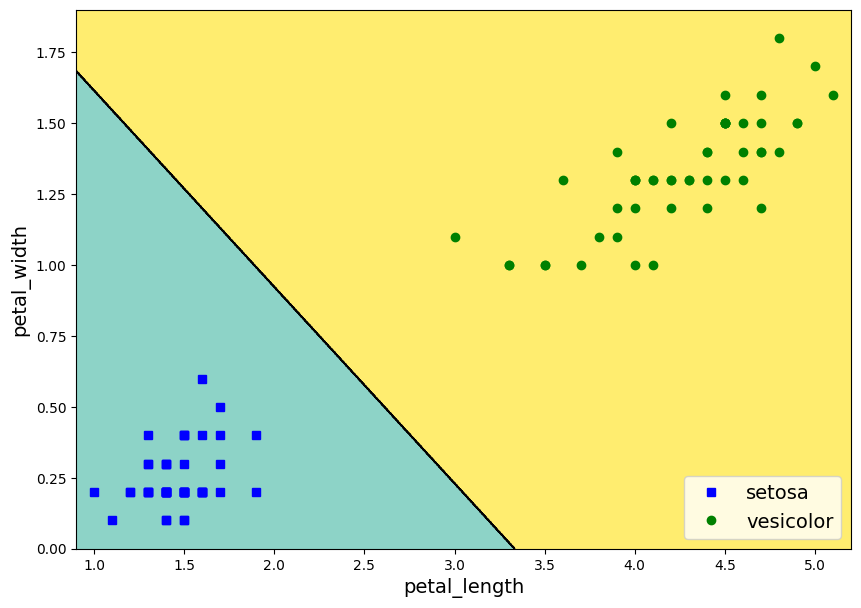

In [16]:
# Representacion grafica del limite de decision
import numpy as np

X = X_df.values
mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

#Calculamos valores intermedios ente el maximo y minimo
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000), np.linspace(mins[1], maxs[1], 1000))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap="Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1,colors='k')
plt.plot(X[:, 0][y_df==0], X[:, 1][y_df==0], 'bs', label="setosa")
plt.plot(X[:, 0][y_df==1], X[:, 1][y_df==1], 'go', label="vesicolor")
plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.show()


In [17]:
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter=1000, random_state=40)
clf.fit(X_df, y_df)


,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,40


In [18]:
y_pred = clf.predict(X_df)


In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_df, y_pred)

1.0

## Ejemplo de predicción

In [25]:
# El modelo se entrenó usando las características petal length (cm) y petal width (cm).
# Setosa --> Longitud pétalo: 1.4; Ancho pétalo: 0.3
# Versicolor --> Longitud pétalo: 4.2; Ancho pétalo: 1.3
while True:
    try:
        # Longitud del pétalo
        petal_length = float(input("Ingrese la longitud del pétalo (cm): "))
        
        # Ancho del pétalo
        petal_width = float(input("Ingrese el ancho del pétalo (cm): "))
        
        # Verificación de datos
        if petal_length < 0 or petal_width < 0:
             print("Error: Los valores deben ser positivos. Intente de nuevo.")
             continue
             
        break
        
    except ValueError:
        print("Error: Ingrese un valor numérico válido. Intente de nuevo.")

# Preparación de datos para predicción
new_data = np.array([[petal_length, petal_width]])

# Predicción
prediction = clf.predict(new_data)
predicted_class_index = int(prediction[0])

# Se obtiene nombre de la flor
predicted_flower_name = target_names[predicted_class_index]

print("Datos Ingresados:")
print(f"Longitud del Pétalo: {petal_length:.2f} cm")
print(f"Ancho del Pétalo: {petal_width:.2f} cm")
print(f"Tipo flor: {predicted_flower_name}")

Ingrese la longitud del pétalo (cm):  4.2
Ingrese el ancho del pétalo (cm):  1.3


Datos Ingresados:
Longitud del Pétalo: 4.20 cm
Ancho del Pétalo: 1.30 cm
Tipo flor: versicolor


C:\Users\mcdav\anaconda3\envs\MachineLearning2\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
